In [51]:
import pandas as pd
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [52]:
dataset = pd.read_csv('/content/drive/My Drive/Skripsi/pdfGaruda.csv', sep=";")

In [53]:
dataset['label'] = dataset.label.map({'Benign':0, 'mal-html':1, 'mal-pdf':2})

In [54]:
dataset.head(79)

,Nama PDF,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,...,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors>2^24,label
0,490083,87,87,34,34,1,1,1,12,0,...,0,0,0,0,0,0,0,0,0,0
1,490084,61,61,22,22,2,2,2,7,0,...,0,0,0,0,0,0,0,0,0,0
2,490085,57,57,17,17,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
3,490086,74,74,19,19,2,2,2,8,0,...,0,0,0,0,0,0,0,0,0,0
4,490087,61,61,17,17,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,495639,59,59,27,27,1,1,1,6,0,...,0,0,0,0,0,0,0,0,0,0
75,491834,42,42,12,12,2,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
76,693966.pdf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77,490330,45,45,35,35,0,0,2,8,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X=dataset.drop(['Nama PDF', 'label'], axis=1)
y=dataset.label

In [56]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

skf = StratifiedKFold(n_splits=5)
score_skf = []
cm_skf = []

In [58]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="gini",
                            max_depth=10,
                            min_samples_leaf=3,
                            min_samples_split=3
                            )

In [59]:
i=1
for train_set, test_set in skf.split(X, y):
  tree.fit(X.loc[train_set], y[train_set])
  sco = tree.score(X.loc[test_set],y[test_set])
  score_skf.append(sco)
  y_pred=tree.predict(X.loc[test_set])
  cm=confusion_matrix(y[test_set], y_pred)
  cm_skf.append(cm)
  print("iteration ", i)
  i +=1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [60]:
score_skf

[0.9995, 0.9995, 0.9995, 0.9995, 0.999]

In [61]:
cm_skf

[array([[1960,    0,    0],
        [   0,   39,    0],
        [   1,    0,    0]]), array([[1960,    0,    0],
        [   0,   39,    0],
        [   1,    0,    0]]), array([[1960,    0,    0],
        [   0,   39,    0],
        [   1,    0,    0]]), array([[1960,    0,    0],
        [   0,   39,    0],
        [   1,    0,    0]]), array([[1960,    0,    0],
        [   0,   38,    0],
        [   2,    0,    0]])]

In [62]:
tar = ['2','1','0']
feat = ['obj','endobj',	'stream',	'endstream',	'xref',	'trailer',	'startxref','/Page', '/Encrypt', '/ObjStm', '/JS', '/JavaScript',
                '/AA', '/OpenAction', '/AcroForm', '/JBIG2Decode', '/RichMedia',
                '/Launch', '/EmbeddedFile', '/XFA', '/Colors>2^24']

In [63]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_pdfmalware.GV", 
                class_names=tar, feature_names=feat, 
                impurity=False, filled=True
                )

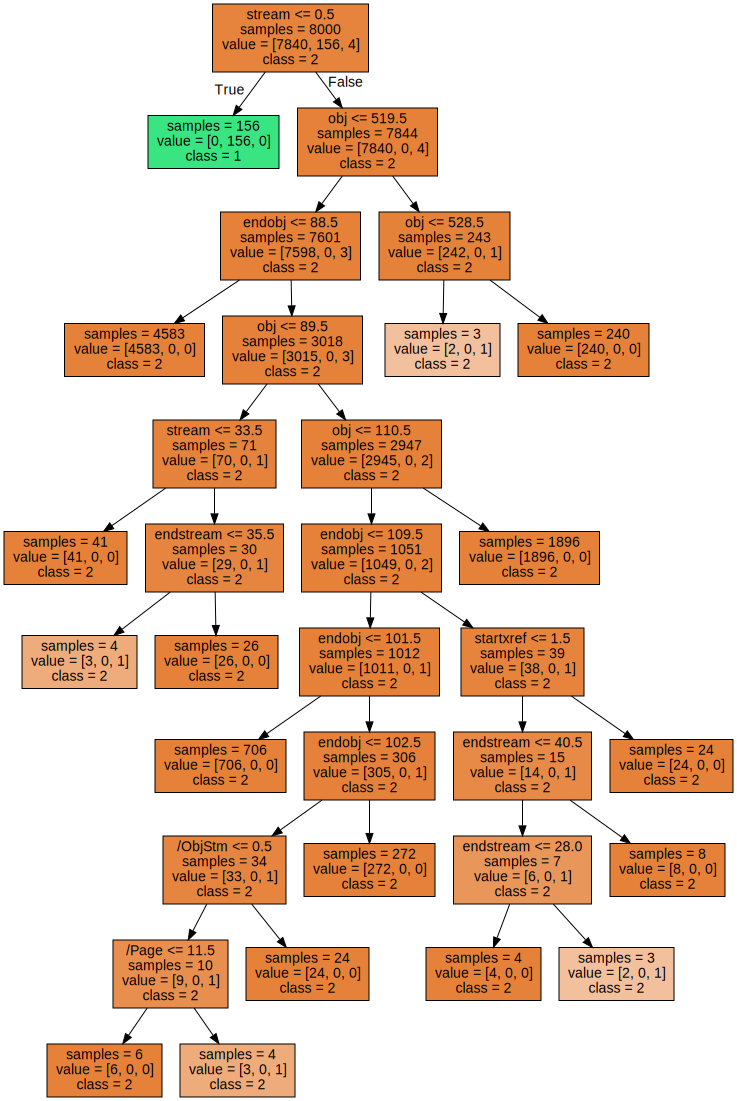

In [64]:
import graphviz

with open("tree_pdfmalware.GV") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)